In [1]:
from qiskit import qasm3

# .loads() from string, .load() to stream from file
circuit = qasm3.loads("""
  OPENQASM 3.0;
  include "stdgates.inc";
  qubit q;
  qubit[3] qr;
  bit c;
  bit[3] cr;
  h q;
  c = measure q;
  if (c) {
    h qr[0];
    cx qr[0], qr[1];
    cx qr[0], qr[2];
  } else {
    h qr[2];
    cx qr[2], qr[1];
    cx qr[2], qr[0];
  }
  cr = measure qr;
""")

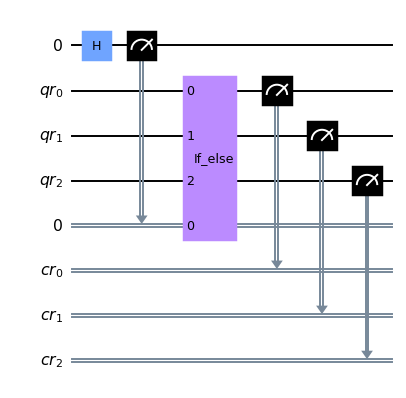

In [2]:
circuit.draw(output='mpl', scale=0.7)

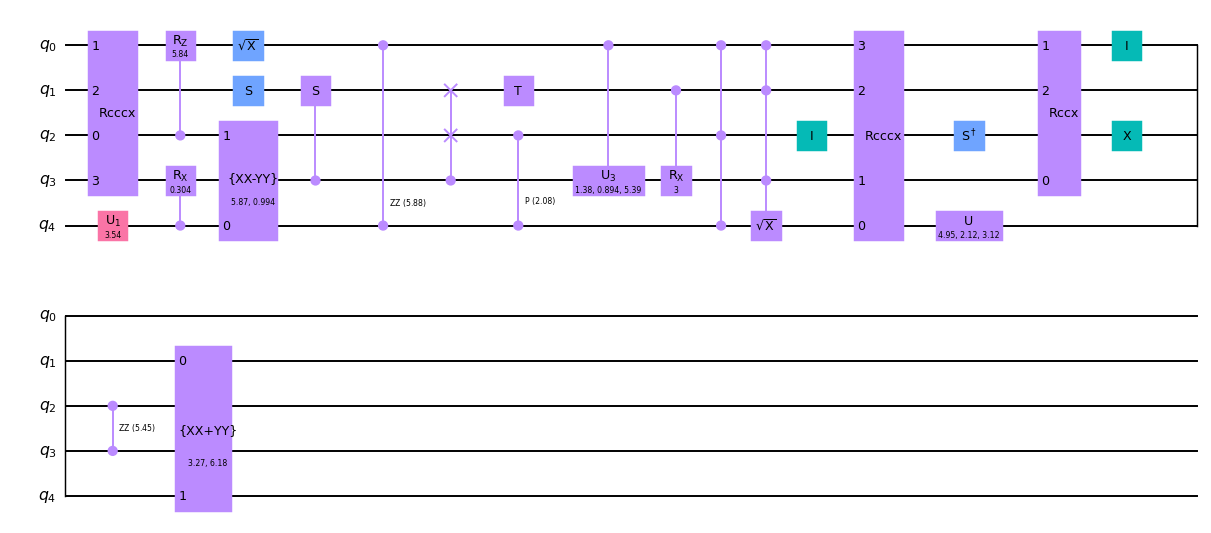

In [3]:
from qiskit.circuit.random import random_circuit
qc = random_circuit(5, 10)
qc.draw(output='mpl', scale=0.7)

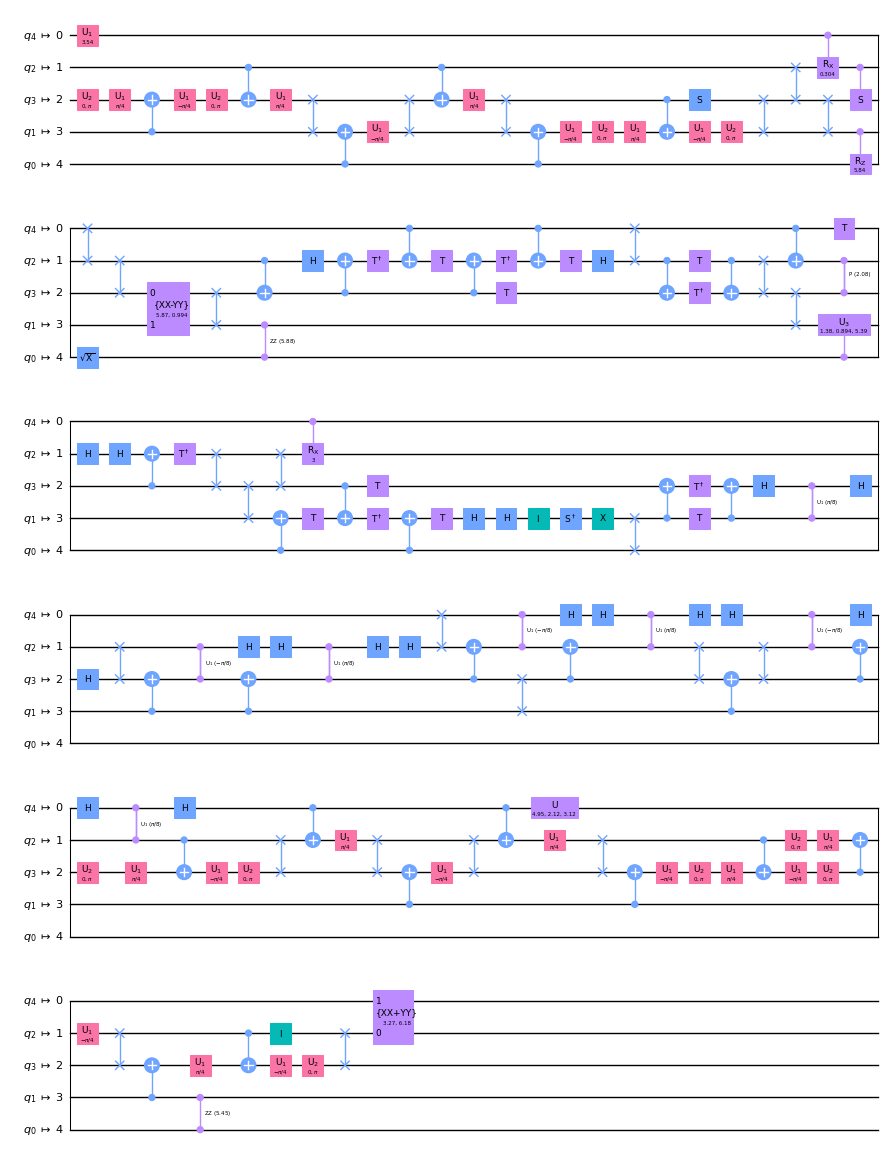

In [4]:
from qiskit.transpiler import CouplingMap, PassManager
from qiskit.transpiler.passes import SabreLayout, Unroll3qOrMore

coupling_map = CouplingMap([[0, 1], [1, 2], [2, 3], [3, 4]])
pm = PassManager([Unroll3qOrMore(), SabreLayout(coupling_map, layout_trials=10)])
qc_l = pm.run(qc)
qc_l.draw(output='mpl', scale=0.5)

In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Clifford, random_clifford
from qiskit.synthesis.clifford import synth_clifford_greedy, synth_clifford_layers

clifford = random_clifford(5, seed=0)
print(clifford)

Clifford: Stabilizer = ['+XYZXZ', '+XZZIY', '-ZZYYI', '+IXYZY', '-YZYXY'], Destabilizer = ['-ZXXIZ', '+IYZII', '-IXXXI', '-IXXII', '-IZYIZ']


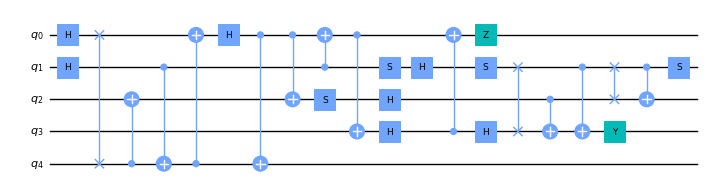

In [6]:
qc = synth_clifford_greedy(clifford)
qc.draw(output='mpl', scale=0.5)

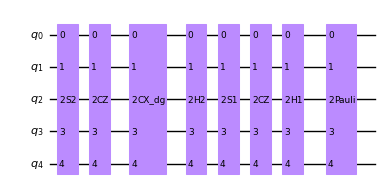

In [7]:
qc = synth_clifford_layers(clifford)
qc.draw(output='mpl', scale=0.5)

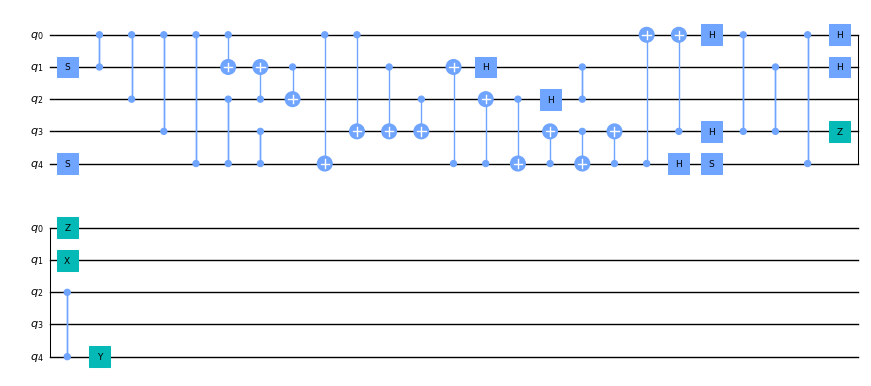

In [8]:
qc.decompose().draw(output='mpl', scale=0.5)